<a href="https://colab.research.google.com/github/pvelosa/podcast-recomendation-system/blob/master/review_spotify_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing data




In [1]:
from google.colab import drive


In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import sqlite3 as sql
from bs4 import BeautifulSoup
import re

it is easier if i use sql queries to define whether is positive or negative.in this case i will define a review as positive when rating is >4

i took this from https://www.kaggle.com/soaxelbrooke/keras-rnn-sentiment-classifier

In [4]:
data = pd.read_sql( """
  select content ,
  case when rating <4 then 0
       when rating >4 then 1
  end as sentiment
  from reviews
""", con= sql.connect("drive/My Drive/ML/database.sqlite"))


In [5]:
data.head()

,content,sentiment
0,Thanks for providing these insights. Really e...,1.0
1,Super excited to see this podcast grow. So man...,1.0
2,"I'm a liberal myself, but its pretty obvious a...",0.0
3,I find Tedx talks very inspirational but I oft...,1.0
4,"I love this podcast, it is so good.",1.0


# understanding and priming data

could use sql queries to prime data but im gonna do it the old way

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239923 entries, 0 to 1239922
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   content    1239923 non-null  object 
 1   sentiment  1199118 non-null  float64
dtypes: float64(1), object(1)
memory usage: 18.9+ MB


In [7]:
data.describe()

,sentiment
count,1.199118e+06
mean,8.920090e-01
std,3.103692e-01
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [8]:
data.sentiment.value_counts()

1.0    1069624
0.0     129494
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


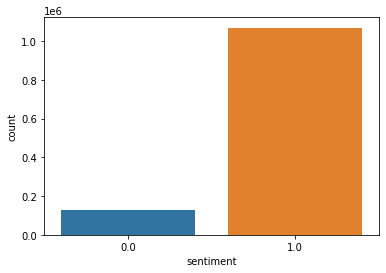

In [9]:
sns.countplot(data.sentiment)

In [10]:
def strip_html(text):
  soup = BeautifulSoup(text ,'html.parser')
  return soup.get_text()

def remove_special_character_text(text):
  strip_html(text)
  pattern = r'[^a-zA-z0-9\s]'#r treats the following as raw strings
  re.sub(pattern, '', text)
  return text 
  
  

In [11]:
data['content'] = data['content'].apply(remove_special_character_text)


In [18]:
data['sentiment'] = data['sentiment'].values.astype('int64')

In [19]:
data['sentiment'] 

0          1
1          1
2          0
3          1
4          1
          ..
1239918    1
1239919    1
1239920    1
1239921    1
1239922    1
Name: sentiment, Length: 1239923, dtype: int64

In [20]:
x_data = data.content
y_data = data.sentiment
x_train, x_test,  y_train, y_test = train_test_split(x_data, y_data,  test_size=0.25, random_state=0)

In [21]:
x_train.head()

588615    Mandi has crucial taste in music. Real streetp...
795077    I really missed having superhero round up for ...
527068    In his own positive, warm and friendly way, Ro...
232780    Angelo has put his heart and soul into his pod...
759063    Man from start to finish this podcast was funn...
Name: content, dtype: object

In [22]:
y_train

588615    1
795077    1
527068    1
232780    1
759063    1
         ..
359783    1
152315    0
963395    1
117952    1
305711    0
Name: sentiment, Length: 929942, dtype: int64

#using TD-IDF vectorizer


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec.fit(x_train)
X_train = vec.transform(x_train)
X_test = vec.transform(x_test)




In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_predict = lr.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.9215500304857395


In [31]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predict, average='weighted')
print(f1)

0.9080495786118776


In [32]:
score_test = lr.score(X_test, y_test)
print(score_test)
score_train = lr.score(X_train, y_train)
print(score_train)

0.9215500304857395
0.9258018241997888


#interface

In [34]:
print('how many recommendations do you want today?')
number_of_podcasts = input()

how many recommendations do you want today?
15
